# **An ensemble of Deep Learning & vision-based techniues for Advanced Lane Detection**

# **CNN Model with BDD100k dataset**

# **Workflow Diagram**



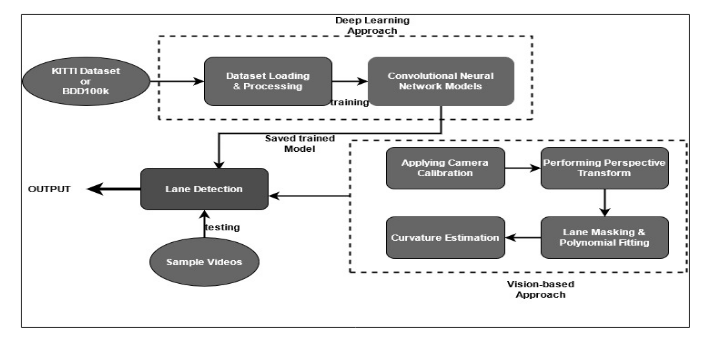

# Necessary Import

In [ ]:
!pip install q keras==2.6.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Import necessary items from Keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

# Methods for Performance Metrics Measures & Graph Plotting

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_score = model.evaluate(X_train, y_train, verbose=0)
    test_score = model.evaluate(X_test, y_test, verbose=0)
    return train_score, test_score

In [ ]:
def acc_plot(m):
  plt.figure(figsize=(8,5))
  sb.set_style("darkgrid")
  plt.plot(m.history['accuracy'],color="#E74C3C",marker='o')
  plt.plot(m.history['val_accuracy'],color='#641E16',marker='h')
  plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='best')
  plt.show()

In [ ]:
def loss_plot(m):
  plt.figure(figsize=(8,5))
  sb.set_style("darkgrid")
  plt.plot(m.history['loss'],color="#E74C3C",marker='o')
  plt.plot(m.history['val_loss'],color='#641E16',marker='h')
  plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='best')
  plt.show()

# Data Loading & processing

In [ ]:
# Load training images
train_images = pickle.load(open("/content/drive/MyDrive/MajorProject/BDD10k/full_CNN_train.p", "rb" ))

# Load image labels
labels = pickle.load(open("/content/drive/MyDrive/MajorProject/BDD100k/full_CNN_labels.p", "rb" ))

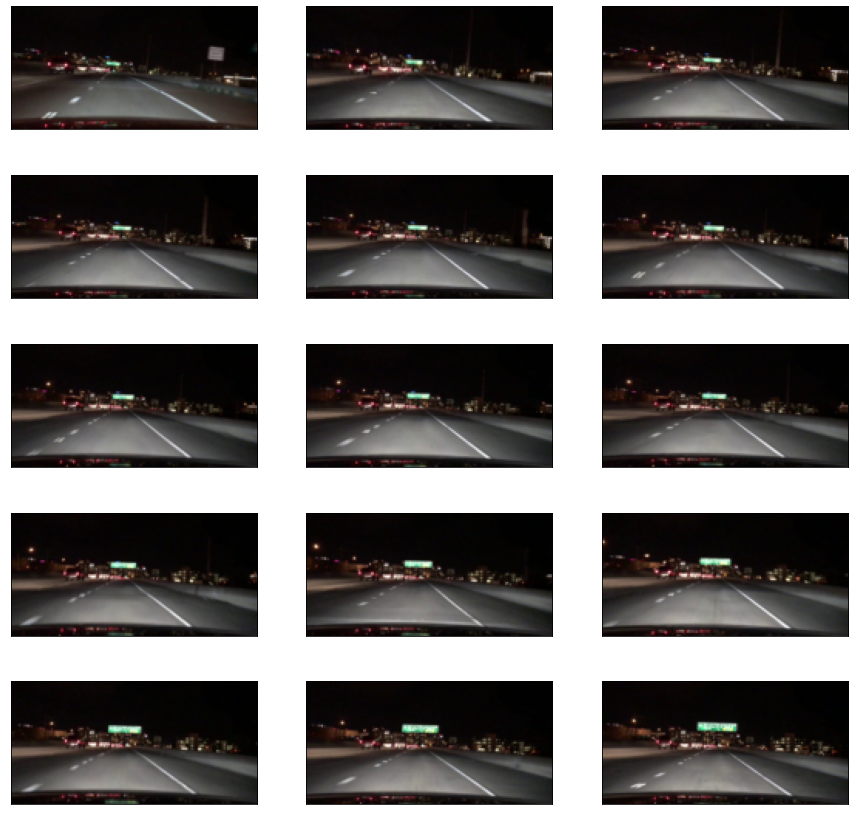

In [ ]:
#Some images of the data

plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

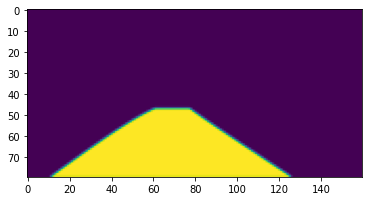

In [ ]:
# Labels
import tensorflow as tf
plt.imshow((tf.squeeze(labels[1])))

In [ ]:
# Make into arrays as  the input to neural network
train_images = np.array(train_images)
labels = np.array(labels)

# Normalize labels -
labels = labels / 255

# Shuffle images along with their labels, then split into training/test sets
train_images, labels = shuffle(train_images, labels)

# Train- 90% & Test size 10%
X_train, X_test, y_train, y_test = train_test_split(train_images, labels, test_size=0.1)



print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (11487, 80, 160, 3)
11487 train samples
1277 test samples


In [ ]:
# Batch size, epochs and pool size below are all paramaters to fiddle with for optimization
batch_size = 128
epochs = 100
pool_size = (2, 2)
num_labels = 3
input_shape = X_train.shape[1:]

# **Model Architecture**


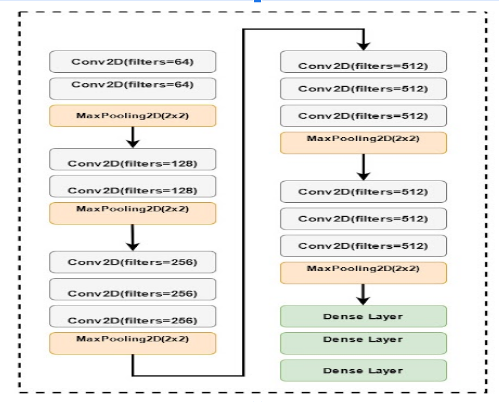

In [ ]:
from keras.layers import Dense, Activation, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(80,160,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 80, 160, 64)       1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 80, 160, 64)       36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 40, 80, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 40, 80, 128)       73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 40, 80, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 40, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 20, 40, 256)      

In [ ]:
adam = Adam(lr=1e-4, beta_1=0.99, beta_2=0.999)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [ ]:
m_1 = model.fit(X_train, y_train, batch_size=512),steps_per_epoch = len(X_train) / 512, epochs=100, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/100
97/97 [==============================] - 68s 367ms/step - loss: 1.8352 - accuracy: 0.4178 - val_loss: 3.1734 - val_accuracy: 0.1355
Epoch 2/100
97/97 [==============================] - 35s 353ms/step - loss: 1.2402 - accuracy: 0.5658 - val_loss: 2.4441 - val_accuracy: 0.2532
Epoch 3/100
97/97 [==============================] - 35s 356ms/step - loss: 1.0245 - accuracy: 0.6383 - val_loss: 1.2924 - val_accuracy: 0.5507
Epoch 4/100
97/97 [==============================] - 35s 354ms/step - loss: 0.8753 - accuracy: 0.6898 - val_loss: 0.7801 - val_accuracy: 0.7274
Epoch 5/100
97/97 [==============================] - 35s 359ms/step - loss: 0.7881 - accuracy: 0.7219 - val_loss: 0.8356 - val_accuracy: 0.7250
Epoch 6/100
97/97 [==============================] - 35s 360ms/step - loss: 0.7271 - accuracy: 0.7466 - val_loss: 0.8090 - val_accuracy: 0.7378
Epoch 7/100
97/97 [==============================] - 35s 363ms/step - loss: 0.6759 - accuracy: 0.7644 - val_loss: 0.7253 - val_accuracy:

### **Performance Metrics Analysis for Model**

In [ ]:
model_evaluation_report(model, x_train, y_train, x_test, y_test)

                    LOSS      ACCURACY
--------------------------------------
Training:         0.1284       95.5100
Test:             0.4415       87.9600
Normal diff         70.91 


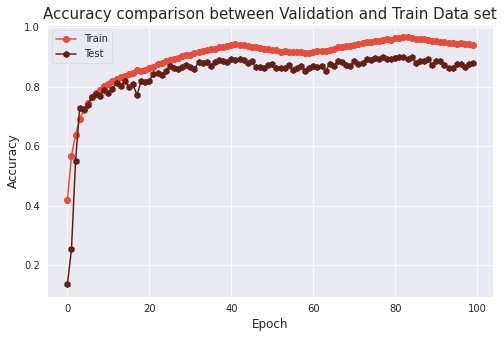

In [ ]:
acc_plot(m_1)

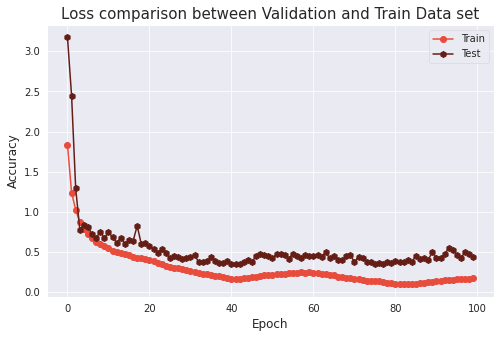

In [ ]:
loss_plot(m_1)

# Saving model to the drive

In [ ]:
# Save model architecture and weights
model.save('/content/drive/MyDrive/MajorProject/models/CNN_model1.h5')

# **Functions for vision- based techniques**

In [ ]:
test_frames = glob.glob('/content/drive/MyDrive/MajorProject/VideoFrames/frame*.jpg')

# **Applying Camera Calibration**


These images are undistorted


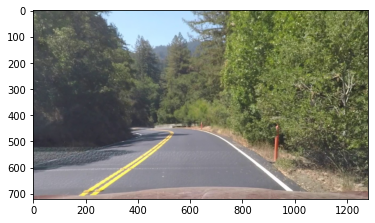

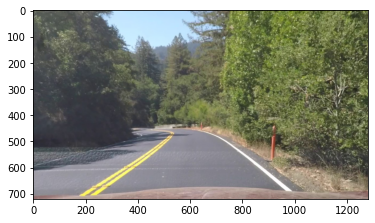

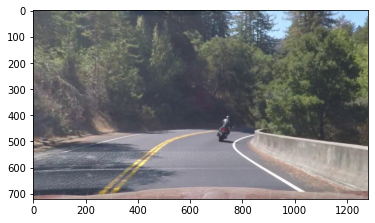

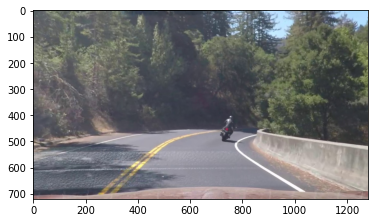

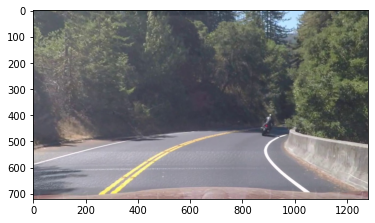

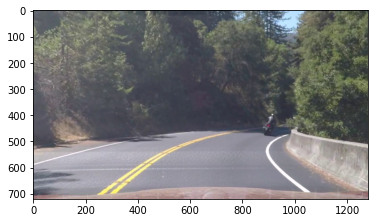

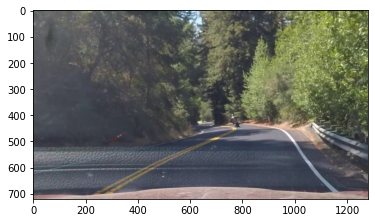

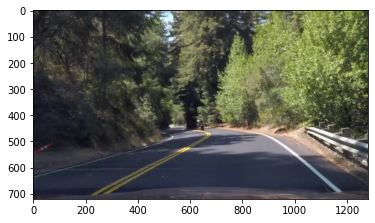

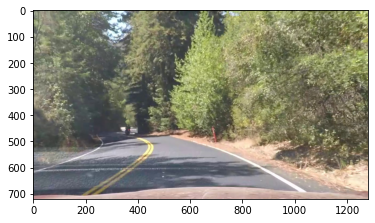

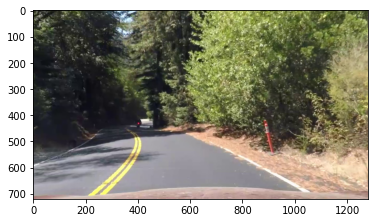

In [ ]:

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.



# Step through the list and search for chessboard corners
for fname in test_frames:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Convert to grayscale

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.waitKey(500)

cv2.destroyAllWindows()



undist_array = []

def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


for fname in test_images:
    image1 = mpimg.imread(fname)
    undistorted = cal_undistort(image1, objpoints, imgpoints)
    undist_array.append(undistorted)
    plt.figure()
    plt.imshow(undistorted)

print('\nThese images are undistorted')

# **Function for conversion to threshold binary images**

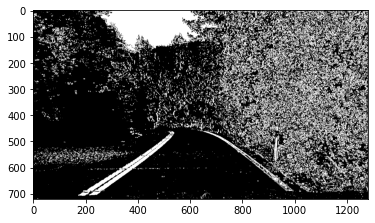

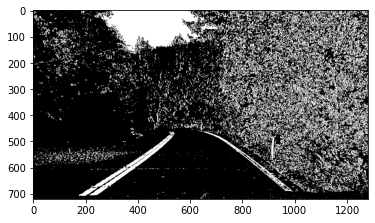

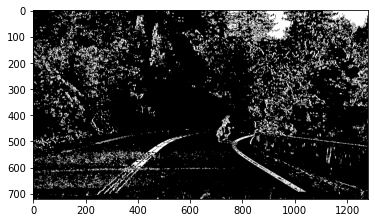

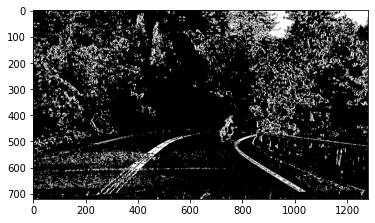

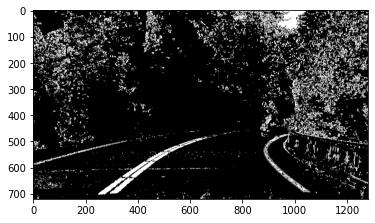

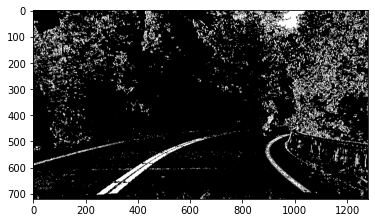

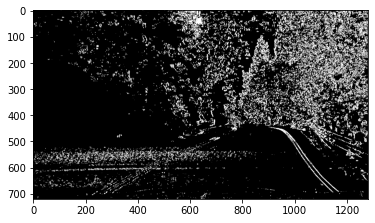

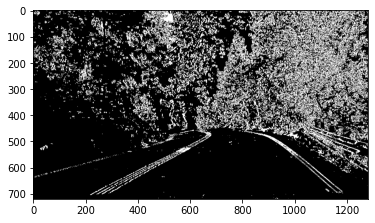

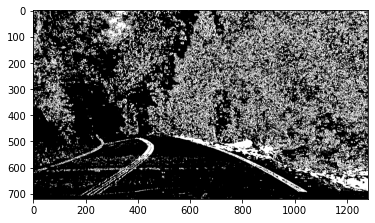

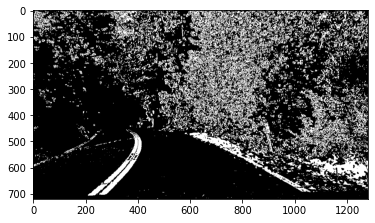

In [ ]:
binary_image_array = []

for image in undist_array:
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Threshold x gradient
    thresh_min = 20
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # Threshold color channel
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    binary_image_array.append(combined_binary)
    plt.figure()
    plt.imshow(combined_binary, cmap='gray')

In [ ]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

img_size = (image.shape[1], image.shape[0])

src = np.float32([[590,450],[687,450],[1100,720],[200,720]])

dst = np.float32([[300,0],[900,0],[900,720],[300,720]])

M = cv2.getPerspectiveTransform(src, dst)

M_inverse = cv2.getPerspectiveTransform(dst, src)

## **Performing Perspective Transform on binary images to get warped images**

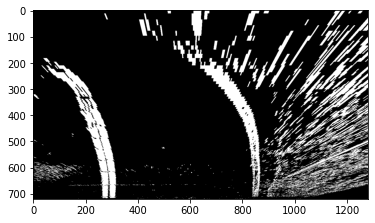

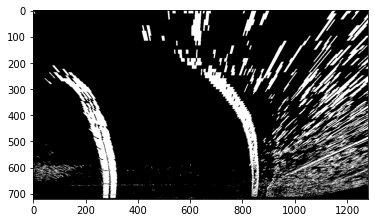

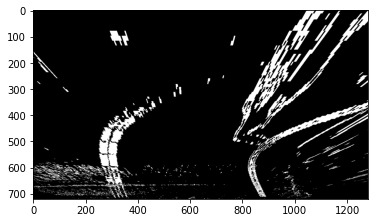

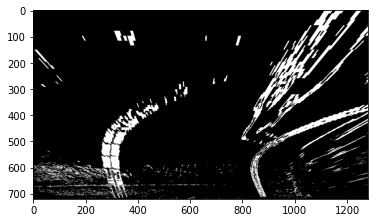

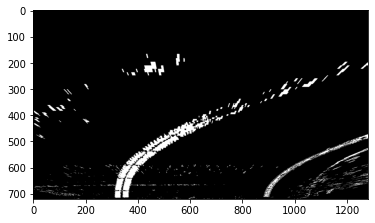

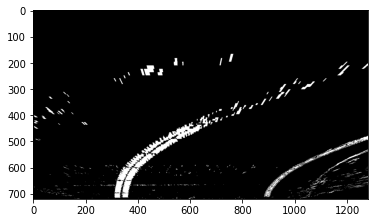

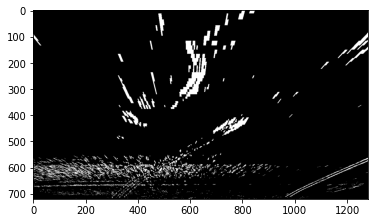

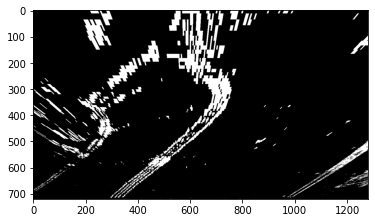

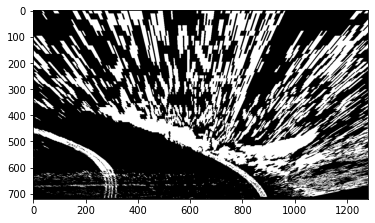

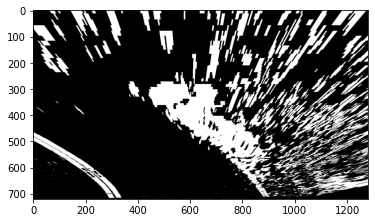

In [ ]:
def applyTransformation(img, src, dst):

    # Compute and apply perpective transform
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    applyTransformation = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_NEAREST)  # keep same size as input image

    return applyTransformation


    warped_image = warper(img, src, dst)
    binary_warped_images.append(warped_image)


# **Lane masking**

In [ ]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2)
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2)

        ### Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###

        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

# **Polynomial Fitting**

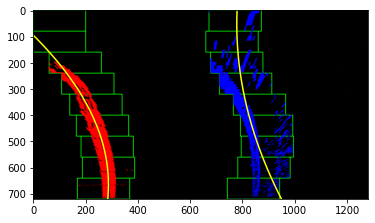

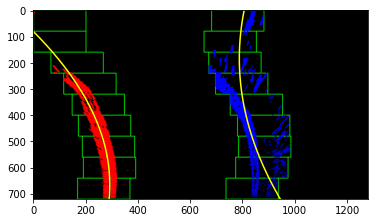

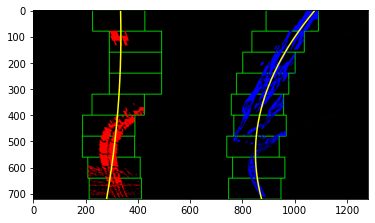

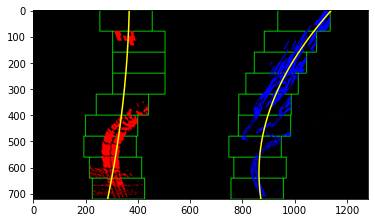

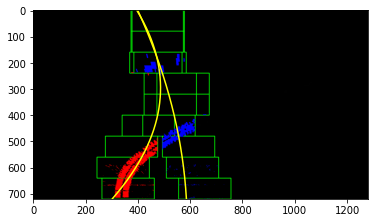

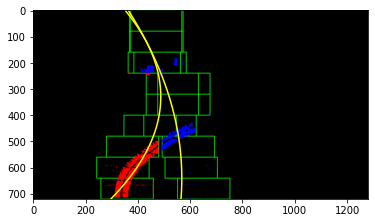

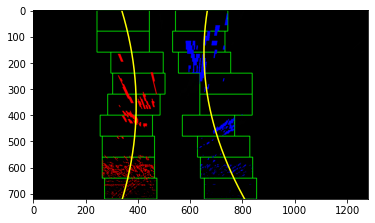

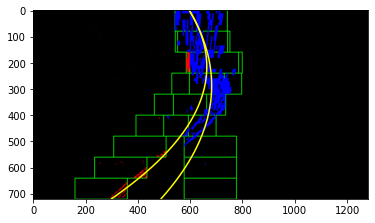

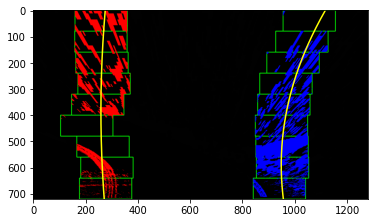

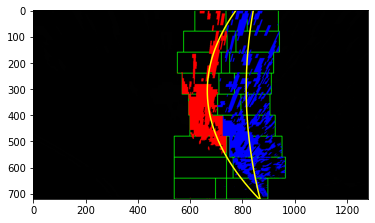

<Figure size 432x288 with 0 Axes>

In [ ]:


    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img


#out_img = fit_polynomial(binary_warped_images[0])
#plt.imshow(out_img)
for img in binary_warped_images:
    result = fit_polynomial(img)
    plt.imshow(result)
    plt.figure()

## **Curvature Estimation**

In [ ]:

def calcCurvature(left_fit, right_fit):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    ploty = np.linspace(0, 719, num=720)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)

    # Set y-value to bottom of the image
    y_eval = 719
    # Calculate left and right curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    # Match them together
    curverad = (left_curverad + right_curverad) / 2

    # Use the last ten values and build the average of them
    prev_curvatures.append(curverad)
    avg_curverad = np.average(prev_curvatures[-10:])

    # Return the average curvature in meter
    return avg_curverad



def displayInfo(img, curverad, car_off):
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    curve_disp_txt = 'Radius of Curvature: ' + str(np.round(curverad,2)) + 'm'
    off_disp_txt = 'Center offset: ' + str(np.round(car_off,2)) + 'm'
    cv2.putText(img, curve_disp_txt, (20, 30), font, 1, (0,0,0), 2)
    cv2.putText(img, off_disp_txt, (20, 60), font, 1, (0,0,0), 2)
    return img

# **Final pipeline all funtions for video processing**

In [ ]:
def findLanes(process_video):
    # Copy and crop the image
    img_cropped = np.copy(img)
    img_cropped = undist_array(img_cropped, [src_points.astype(np.int32)])

    # Apply image transformation
    img_warped = applyTransformation(img_cropped)

     # Combine color and sobel mask
    img_mask =  fit_polynomials(img_warped, img_color)

    # Find the lines from polyfit
    left_fit, right_fit, _ =  find_lane_pixels(img_mask)

    # Create the lane mask and apply backtransformation
    lane_mask =  calcCurvature(img, left_fit, right_fit)

    # Combine the sample image with the lane layer
    img_result = cv2.addWeighted(img, 1, lane_mask, 1, 0)

    return img_result

# Final processing for Video Output

In [ ]:
if __name__ == '__main__':
    # Load earlier trained model
    model = load_model('/content/drive/MyDrive/MajorProject/models/CNN_model1.h5')

    # Where to save the output video
    vid_output = "/content/drive/MyDrive/MajorProject/BDD100k/v1_output.mp4"
    # Location of the input video
    clip1 = VideoFileClip("/content/drive/MyDrive/MajorProject/samplevideos/v1.mp4")
    # Create the clip
    vid_clip = clip1.fl_image(process_video)
    vid_clip.write_videofile(vid_output, audio=False)

[MoviePy] >>>> Building video /content/drive/MyDrive/MajorProject/result_video/v1_output.mp4
[MoviePy] Writing video /content/drive/MyDrive/MajorProject/result_video/v1_output.mp4


100%|██████████| 485/485 [18:57<00:00,  2.34s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/MajorProject/result_video/v1_output.mp4 

CPU times: user 18min 54s, sys: 3.47 s, total: 18min 57s
Wall time: 18min 59s


# END :]